## import resources/root file

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import trange
import uproot as up
import pandas as pd
import seaborn as sns



In [2]:
#!ls -ltr MCSamples/

## total number of events

In [3]:
# total number of events
def getNevents(filename,nTree):
    file = up.open(filename);
    data = file["ntuplizer"];
    tree1data = file["ntuplizer"]["tree;" + str(nTree)]
    return len(tree1data.pandas.df(["genParticle_phi"], flatten = False))


S = 0
S += getNevents("MCSamples/flatTuple_part0.root",3)
S += getNevents("MCSamples/flatTuple_part0.root",2)

S += getNevents("MCSamples/flatTuple_part1.root",3)
S += getNevents("MCSamples/flatTuple_part1.root",2)

S += getNevents("MCSamples/flatTuple_part2.root",3)
S += getNevents("MCSamples/flatTuple_part2.root",2)

S += getNevents("MCSamples/flatTuple_part3.root",3)
S += getNevents("MCSamples/flatTuple_part3.root",2)

S += getNevents("MCSamples/flatTuple_part4.root",3)
S += getNevents("MCSamples/flatTuple_part4.root",2)

S += getNevents("MCSamples/flatTuple_part5.root",2)##
S += getNevents("MCSamples/flatTuple_part5.root",1)

S += getNevents("MCSamples/flatTuple_part6.root",3)
S += getNevents("MCSamples/flatTuple_part6.root",2)

S += getNevents("MCSamples/flatTuple_part7.root",2)##
S += getNevents("MCSamples/flatTuple_part7.root",1)

S += getNevents("MCSamples/flatTuple_part8.root",2)##
S += getNevents("MCSamples/flatTuple_part8.root",1)

S += getNevents("MCSamples/flatTuple_part9.root",3)
S += getNevents("MCSamples/flatTuple_part9.root",2)
S

454709

In [4]:
def get_ntuple_tree(filename, treenumber):
    file = up.open("MCSamples/" + filename)
    data = file["ntuplizer"];
    treedata = file["ntuplizer"]["tree;" + str(treenumber)]
    return treedata


filename = "flatTuple_part9.root"
treeN = 2
treedata = get_ntuple_tree(filename, treeN)
treedata.keys();

In [5]:
string = filename[:-5] + "_treeN_" + str(treeN)
string

'flatTuple_part9_treeN_2'

## reconstructed data

First set of requirements for signal

In [6]:
mask_df  = treedata.pandas.df(['BsTauTau_gentaupt', 'BsTauTau_gentaudm', 'BsTauTau_isgen3', "BsTauTau_ngentau"], flatten = True)
mask_df["eventID"] = mask_df.index.get_level_values("entry")
print(len(mask_df))

######################

## requirements
mask_df = mask_df[mask_df.BsTauTau_gentaudm == 10] # decay mode
mask_df = mask_df[mask_df.BsTauTau_isgen3 == 1] # match-gen
mask_df = mask_df[mask_df.BsTauTau_ngentau == 2] # 2 generated
print(len(mask_df))
mask_df.head(4)

22702
1768


,,BsTauTau_gentaupt,BsTauTau_gentaudm,BsTauTau_isgen3,BsTauTau_ngentau,eventID
entry,subentry,,,,,
12,0,16.661772,10,1,2,12
19,0,6.660098,10,1,2,19
20,0,6.047621,10,1,2,20
44,0,7.253698,10,1,2,44


In [7]:
# variables we are interested in 
# target: 'BsTauTau_gentaupt' =  'genParticle_pt', 'genParticle_eta', 'genParticle_phi'

columns_tau = ['BsTauTau_tau_pt', 'BsTauTau_tau_eta', 'BsTauTau_tau_phi',
        'BsTauTau_tau_pi1_dnn', 'BsTauTau_tau_pi2_dnn',
        'BsTauTau_tau_pi3_dnn', 'BsTauTau_tau_pi1_pt', 'BsTauTau_tau_pi1_eta',
        'BsTauTau_tau_pi1_phi', 'BsTauTau_tau_pi2_pt',
        'BsTauTau_tau_pi2_eta', 'BsTauTau_tau_pi2_phi', 
        'BsTauTau_tau_pi3_pt', 'BsTauTau_tau_pi3_eta', 'BsTauTau_tau_pi3_phi',
        'BsTauTau_tau_isRight', 'BsTauTau_tau_isRight1',
        'BsTauTau_tau_isRight2', 'BsTauTau_tau_isRight3', 'BsTauTau_tau_dr1',
        'BsTauTau_tau_dr2', 'BsTauTau_tau_dr3', 'BsTauTau_tau_ptres1',
        'BsTauTau_tau_ptres2', 'BsTauTau_tau_ptres3', 'BsTauTau_tau_matched_gentaupt', 'BsTauTau_tau_matched_ppdgId',
        'BsTauTau_tau_pvips',  b'BsTauTau_tau_rhomass1','BsTauTau_tau_rhomass2','BsTauTau_tau_q','BsTauTau_tau_vx',
        'BsTauTau_tau_vy', 'BsTauTau_tau_vz', 'BsTauTau_tau_max_dr_3prong', 'BsTauTau_tau_lip', 'BsTauTau_tau_lips',
        'BsTauTau_tau_pvip', 'BsTauTau_tau_pvips', 'BsTauTau_tau_fl3d', 'BsTauTau_tau_fls3d', 'BsTauTau_tau_alpha',
        'BsTauTau_tau_vprob']#,

columns_gen = ['genParticle_pdgId', 'genParticle_pt', 'genParticle_eta', 'genParticle_phi', 'genParticle_mother', 
        'genParticle_dau','genParticle_mass']  #'BsTauTau_gentaupt', 'BsTauTau_gentaudm', 'BsTauTau_isgen3',

get all taus and add an eventID column to be used for selections 

In [8]:
BsTauTau_tau_df = treedata.pandas.df(columns_tau, flatten = True) 
BsTauTau_tau_df["eventID"] = BsTauTau_tau_df.index.get_level_values("entry").values

##### # Ntaus reconstructed , Nevents
print(len(BsTauTau_tau_df) , " taus reconstructed within ", len(BsTauTau_tau_df.index.get_level_values("entry").unique()), " events") 
BsTauTau_tau_df.head(4) #

32547  taus reconstructed within  22702  events


BsTauTau_tau_pt  BsTauTau_tau_eta  BsTauTau_tau_phi  \
entry subentry                                                        
0     0                3.108107         -0.217351         -2.679560   
1     0                3.683812          0.778494         -1.415476   
2     0                3.072051         -0.793627         -2.386333   
      1                2.470176         -0.892635         -2.100321   

                BsTauTau_tau_pi1_dnn  BsTauTau_tau_pi2_dnn  \
entry subentry                                               
0     0                     0.300075              0.250840   
1     0                     0.927575              0.897596   
2     0                     0.925965              0.956658   
      1                     0.536692              0.956658   

                BsTauTau_tau_pi3_dnn  BsTauTau_tau_pi1_pt  \
entry subentry                                              
0     0                     0.962368             0.959473   
1     0                     0.158385             0.970703   
2     0                     0.805406             0.956543   
      1                     0.805406             0.504883   

                BsTauTau_tau_pi1_eta  BsTauTau_tau_pi1_phi  \
entry subentry                                               
0     0                    -0.369884             -2.954299   
1     0                     0.867214             -1.656408   
2     0                    -0.583941             -2.649016   
      1                    -0.721458             -1.267231   

                BsTauTau_tau_pi2_pt  ...  BsTauTau_tau_vz  \
entry subentry                       ...                    
0     0                    0.643555  ...         3.371639   
1     0                    2.074219  ...        -2.657594   
2     0                    1.114258  ...         7.365679   
      1                    1.114258  ...         7.374684   

                BsTauTau_tau_max_dr_3prong  BsTauTau_tau_lip  \
entry subentry                                                 
0     0                           0.990456         -0.015077   
1     0                           0.944702         -0.001658   
2     0                           0.572622          0.008358   
      1                           1.151652          0.013772   

                BsTauTau_tau_lips  BsTauTau_tau_pvip  BsTauTau_tau_fl3d  \
entry subentry                                                            
0     0                 -3.217241           0.030635           0.048649   
1     0                 -0.428942           0.008441           0.159547   
2     0                  2.384168           0.018793           0.077458   
      1                  3.856249           0.019745           0.067532   

                BsTauTau_tau_fls3d  BsTauTau_tau_alpha  BsTauTau_tau_vprob  \
entry subentry                                                               
0     0                   4.431050            0.776861            0.870795   
1     0                  11.195339            0.998607            0.817606   
2     0                   4.299075            0.970136            0.723848   
      1                   4.666129            0.956302            0.982452   

                eventID  
entry subentry           
0     0               0  
1     0               1  
2     0               2  
      1               2  

[4 rows x 43 columns]

get all muons and add an eventID column to be used for selections

In [9]:
BsTauTau_mu_df = treedata.pandas.df(["BsTauTau_mu*"], flatten = True)  
BsTauTau_mu_df["eventID"] = BsTauTau_mu_df.index.get_level_values("entry").values
print(len(BsTauTau_mu_df))
BsTauTau_mu_df.head(4)

22702


,,BsTauTau_mu1_pt,BsTauTau_mu1_eta,BsTauTau_mu1_phi,BsTauTau_mu1_mass,BsTauTau_mu1_q,BsTauTau_mu1_isLoose,BsTauTau_mu1_isTight,BsTauTau_mu1_isPF,BsTauTau_mu1_isGlobal,BsTauTau_mu1_isTracker,BsTauTau_mu1_isSoft,BsTauTau_mu1_vx,BsTauTau_mu1_vy,BsTauTau_mu1_vz,BsTauTau_mu1_iso,BsTauTau_mu1_dbiso,eventID
entry,subentry,,,,,,,,,,,,,,,,,
0,0,9.740369,-0.224682,-2.931255,0.1057,1,1,1,1,1,1,1,0.014642,0.023680,3.399305,1.0,2.652452,0
1,0,7.178438,0.618277,0.929369,0.1057,1,1,1,1,1,1,1,0.032776,0.025474,-2.776753,1.0,1.060782,1
2,0,18.326986,-0.955101,0.081698,0.1057,1,1,1,1,1,1,1,0.011441,0.033091,7.381419,1.0,0.560370,2
3,0,7.534092,0.396794,-2.785517,0.1057,-1,1,1,1,1,1,1,0.018409,0.021363,0.931594,1.0,0.000000,3


select events using mask_df

In [10]:
BsTauTau_tau_df = BsTauTau_tau_df[BsTauTau_tau_df['eventID'].isin(mask_df.eventID.unique())] 
BsTauTau_mu_df = BsTauTau_mu_df[BsTauTau_mu_df['eventID'].isin(BsTauTau_tau_df.eventID.unique())]
len(BsTauTau_tau_df),len(mask_df),  len(BsTauTau_mu_df) # check sizes

(2218, 1768, 1768)

In [11]:
## find NAs
BsTauTau_tau_df.isna().sum()

BsTauTau_tau_pt                  0
BsTauTau_tau_eta                 0
BsTauTau_tau_phi                 0
BsTauTau_tau_pi1_dnn             0
BsTauTau_tau_pi2_dnn             0
BsTauTau_tau_pi3_dnn             0
BsTauTau_tau_pi1_pt              0
BsTauTau_tau_pi1_eta             0
BsTauTau_tau_pi1_phi             0
BsTauTau_tau_pi2_pt              0
BsTauTau_tau_pi2_eta             0
BsTauTau_tau_pi2_phi             0
BsTauTau_tau_pi3_pt              0
BsTauTau_tau_pi3_eta             0
BsTauTau_tau_pi3_phi             0
BsTauTau_tau_isRight             0
BsTauTau_tau_isRight1            0
BsTauTau_tau_isRight2            0
BsTauTau_tau_isRight3            0
BsTauTau_tau_dr1                 0
BsTauTau_tau_dr2                 0
BsTauTau_tau_dr3                 0
BsTauTau_tau_ptres1              0
BsTauTau_tau_ptres2              0
BsTauTau_tau_ptres3              0
BsTauTau_tau_matched_gentaupt    0
BsTauTau_tau_matched_ppdgId      0
BsTauTau_tau_pvips               0
BsTauTau_tau_rhomass

In [12]:
### check for signal case (all pions are matched to tau)

sumBool = (BsTauTau_tau_df.BsTauTau_tau_isRight == True).astype(int)
signalmask = sumBool == 1
print(signalmask.sum()) # number of signal taus
signalmask = signalmask[signalmask == True]
signal_events = np.unique(signalmask.index.get_level_values("entry").values)

805


In [13]:
## select events where we have signal taus
####

BsTauTau_tau_df = BsTauTau_tau_df[BsTauTau_tau_df['eventID'].isin(signal_events)]
mask_df = mask_df[mask_df.eventID.isin(BsTauTau_tau_df.eventID.unique())]
BsTauTau_mu_df = BsTauTau_mu_df[BsTauTau_mu_df['eventID'].isin(BsTauTau_tau_df.eventID.unique())]

len(BsTauTau_tau_df),len(mask_df), len(BsTauTau_mu_df) # check sizes

(926, 805, 805)

In [14]:
(BsTauTau_tau_df.BsTauTau_tau_matched_gentaupt != -999).sum() # gen-matched

805

In [15]:
### check for duplicates, there shouldn't be any

print(len(BsTauTau_tau_df.drop_duplicates()) > len(BsTauTau_tau_df))
print(len(BsTauTau_mu_df.drop_duplicates()) > len(BsTauTau_mu_df))

False
False


In [16]:
#    data1["BsTauTau_gentaupt"] = masks_df1["BsTauTau_gentaupt"]

In [17]:
#plt.plot(data1.BsTauTau_tau_pt[data1.decaymode3prong == True], masks_df1.BsTauTau_gentaupt, '.')

In [18]:
# select events where there are 1 reconstructed tau (for now)
BsTauTau_tau_df["1of2taus"] = False
for col,group in BsTauTau_tau_df.groupby("eventID"):
    if len(group) == 1:
        BsTauTau_tau_df.loc[group.index.values, ["1of2taus"]] = True
BsTauTau_tau_df = BsTauTau_tau_df[BsTauTau_tau_df["1of2taus"] == True]
BsTauTau_tau_df = BsTauTau_tau_df.drop(columns = ["1of2taus"])

BsTauTau_mu_df = BsTauTau_mu_df[BsTauTau_mu_df['eventID'].isin(BsTauTau_tau_df.eventID.unique())]
mask_df = mask_df[mask_df.eventID.isin(BsTauTau_tau_df.eventID.unique())]

In [19]:
len(BsTauTau_tau_df), len(BsTauTau_mu_df), len(mask_df) ### by now sizes should be the same

(737, 737, 737)

In [20]:
BsTauTau_tau_df["BsTauTau_gentaupt"] = mask_df["BsTauTau_gentaupt"]
BsTauTau_tau_df.head(4)

,,BsTauTau_tau_pt,BsTauTau_tau_eta,BsTauTau_tau_phi,BsTauTau_tau_pi1_dnn,BsTauTau_tau_pi2_dnn,BsTauTau_tau_pi3_dnn,BsTauTau_tau_pi1_pt,BsTauTau_tau_pi1_eta,BsTauTau_tau_pi1_phi,BsTauTau_tau_pi2_pt,...,BsTauTau_tau_max_dr_3prong,BsTauTau_tau_lip,BsTauTau_tau_lips,BsTauTau_tau_pvip,BsTauTau_tau_fl3d,BsTauTau_tau_fls3d,BsTauTau_tau_alpha,BsTauTau_tau_vprob,eventID,BsTauTau_gentaupt
entry,subentry,,,,,,,,,,,,,,,,,,,,,
12,0,16.457771,0.822734,0.214709,0.982138,0.603085,0.421368,2.595703,0.908963,0.140430,8.226562,...,0.155993,0.074230,39.286957,0.101361,1.068772,31.930779,0.995495,0.833538,12,16.661772
19,0,6.603958,0.730310,2.471383,0.481553,0.986067,0.896672,3.089844,0.663411,2.400272,2.675781,...,0.446812,-0.016065,-4.733607,0.112045,0.698450,44.794254,0.987106,0.268432,19,6.660098
72,0,10.043366,0.013146,-2.897317,0.655806,0.542897,0.982537,2.244141,0.042665,-2.834653,6.558594,...,0.281810,-0.008630,-2.219676,0.077288,0.480438,21.549049,0.986933,0.592891,72,10.053288
107,0,5.239698,-0.549835,-0.814165,0.994344,0.997433,0.999620,2.833984,-0.577899,-0.757051,1.021484,...,0.546612,-0.025939,-5.119175,0.099801,0.648334,27.015110,0.988158,0.371364,107,5.256128


## Filter gendata


In [21]:
#gen data
gen_columns = ['genParticle_pdgId', 'genParticle_pt', 
               'genParticle_eta', 'genParticle_phi', 'genParticle_mother', 
               'genParticle_dau','genParticle_mass']

gendata = treedata.pandas.df(gen_columns, flatten = True)
gendata

genParticle_pdgId  genParticle_pt  genParticle_eta  \
entry subentry                                                       
0     0                      2212        0.000000     29256.000000   
      1                      2212        0.000000    -29256.000000   
      2                        21        0.000000     22965.087891   
      3                        21        0.000000    -22775.814453   
      4                        21       16.648996         3.206387   
...                           ...             ...              ...   
22701 131                    -211        2.037116         0.593164   
      132                     211       11.008129         0.684696   
      133                     111        1.231968         0.702387   
      134                      22        0.228509         0.683132   
      135                      22        1.010797         0.702316   

                genParticle_phi  \
entry subentry                    
0     0                0.000000   
      1                0.000000   
      2                0.000000   
      3                0.000000   
      4                0.599370   
...                         ...   
22701 131             -2.504468   
      132             -2.528858   
      133             -2.590685   
      134             -2.361042   
      135             -2.642168   

                                               genParticle_mother  \
entry subentry                                                      
0     0         [[], [], [2212], [2212], [21, 21], [21, 21], [...   
      1         [[], [], [2212], [2212], [21, 21], [21, 21], [...   
      2         [[], [], [2212], [2212], [21, 21], [21, 21], [...   
      3         [[], [], [2212], [2212], [21, 21], [21, 21], [...   
      4         [[], [], [2212], [2212], [21, 21], [21, 21], [...   
...                                                           ...   
22701 131       [[], [], [2212], [2212], [21, 21], [21, 21], [...   
      132       [[], [], [2212], [2212], [21, 21], [21, 21], [...   
      133       [[], [], [2212], [2212], [21, 21], [21, 21], [...   
      134       [[], [], [2212], [2212], [21, 21], [21, 21], [...   
      135       [[], [], [2212], [2212], [21, 21], [21, 21], [...   

                                                  genParticle_dau  \
entry subentry                                                      
0     0         [[21, -5, -411, -1, 21, 1, 533, 2, 2212, 21, 2...   
      1         [[21, -5, -411, -1, 21, 1, 533, 2, 2212, 21, 2...   
      2         [[21, -5, -411, -1, 21, 1, 533, 2, 2212, 21, 2...   
      3         [[21, -5, -411, -1, 21, 1, 533, 2, 2212, 21, 2...   
      4         [[21, -5, -411, -1, 21, 1, 533, 2, 2212, 21, 2...   
...                                                           ...   
22701 131       [[21, 4, -4, -4, 4, -1, 1, -1, 1, -2, 421, -41...   
      132       [[21, 4, -4, -4, 4, -1, 1, -1, 1, -2, 421, -41...   
      133       [[21, 4, -4, -4, 4, -1, 1, -1, 1, -2, 421, -41...   
      134       [[21, 4, -4, -4, 4, -1, 1, -1, 1, -2, 421, -41...   
      135       [[21, 4, -4, -4, 4, -1, 1, -1, 1, -2, 421, -41...   

                genParticle_mass  
entry subentry                    
0     0             9.382700e-01  
      1             9.382700e-01  
      2             3.814697e-06  
      3             5.331202e-07  
      4             0.000000e+00  
...                          ...  
22701 131           1.395700e-01  
      132           1.395700e-01  
      133           1.349800e-01  
      134           6.452392e-09  
      135           2.356080e-08  

[1900638 rows x 7 columns]

In [22]:
# get gen events with signal taus
gendata["eventID"] = gendata.index.get_level_values("entry")
gendata["sub-eventID"] = gendata.index.get_level_values("subentry")
gensignalevents =  gendata[gendata.eventID.isin(BsTauTau_tau_df.eventID.unique())]

## gentaus

In [23]:
# get taus & neutrinos
taumask = (gensignalevents.genParticle_pdgId == 15)  | (gensignalevents.genParticle_pdgId == -15) 

gentaus = gensignalevents[taumask]

In [24]:
## get mother of taus
gentaus["mother"] = False
for i,mothers_list in enumerate(gentaus.genParticle_mother.values):
    tau_mother_idx = gentaus.iloc[i,:].loc["sub-eventID"]
    #print(i, mothers_list[tau_mother_idx][0])
    if len(mothers_list[tau_mother_idx]) != 1: ## if more than one mother, skip
        continue
    gentaus["mother"].iloc[i] = mothers_list[tau_mother_idx][0]

/Users/hevjinyarar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hevjinyarar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/hevjinyarar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [25]:
## get daughters of taus
gentaus.loc[:,"daughters"] = False
gentaus.loc[:,"daughters"] = gentaus.loc[:,"daughters"].astype(object)
for i,daughters_list in enumerate(gentaus.genParticle_dau.values):
    tau_daughter_idx = gentaus.loc[:,"sub-eventID"].iloc[i]
    gentaus.loc[:,"daughters"].iloc[i] = daughters_list[tau_daughter_idx]

/Users/hevjinyarar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/hevjinyarar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/hevjinyarar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

In [26]:
gentaus = gentaus.drop(columns = ["genParticle_mother", "genParticle_dau"])
gentaus.head(4)

genParticle_pdgId  genParticle_pt  genParticle_eta  \
entry subentry                                                       
12    45                       15       17.769590         0.842469   
      50                      -15       12.969295         1.099814   
19    100                     -15        7.864181         0.676350   
      105                      15       26.367165         0.676991   

                genParticle_phi  genParticle_mass  eventID  sub-eventID  \
entry subentry                                                            
12    45               0.211340           1.77682       12           45   
      50               0.269515           1.77682       12           50   
19    100              2.444206           1.77682       19          100   
      105              2.213060           1.77682       19          105   

               mother              daughters  
entry subentry                                
12    45         -531  [-211, -211, 211, 16]  
      50         -531         [-13, 14, -16]  
19    100         531  [211, 211, -211, -16]  
      105         531          [13, -14, 16]

In [27]:
## select events with 2 gentaus
gentaus["2taus"] = False
for col,group in gentaus.groupby("eventID"):
    if len(group) == 2:
        gentaus.loc[group.index.values, ["2taus"]] = True
gentaus = gentaus[gentaus["2taus"] == True]
gentaus = gentaus.drop(columns = ["2taus"])


In [28]:
## select events with at least one muon from one tau
gentaus["muondecay"] = False
for col,group in gentaus.groupby("eventID"):
    for (idx, tau) in group.iterrows():
        if ((13 in tau.daughters) or (-13 in tau.daughters)) == True:
            gentaus["muondecay"].loc[idx] = True
######       
            
events = []
for col,group in gentaus.groupby("eventID"):
    if group.muondecay.sum() == 1:
        events.append(col)
events = np.asarray(events)
print(len(events))

######

gentaus = gentaus[gentaus.eventID.isin(events)]
gentaus

/Users/hevjinyarar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


585


genParticle_pdgId  genParticle_pt  genParticle_eta  \
entry subentry                                                       
12    45                       15       17.769590         0.842469   
      50                      -15       12.969295         1.099814   
19    100                     -15        7.864181         0.676350   
      105                      15       26.367165         0.676991   
72    66                       15       12.392759        -0.013544   
...                           ...             ...              ...   
22434 83                       15       50.025242         0.026883   
22486 48                      -15       29.144579         0.987034   
      53                       15       14.334844         1.099685   
22608 63                       15        4.871899         0.900070   
      68                      -15       21.015043         0.725946   

                genParticle_phi  genParticle_mass  eventID  sub-eventID  \
entry subentry                                                            
12    45               0.211340           1.77682       12           45   
      50               0.269515           1.77682       12           50   
19    100              2.444206           1.77682       19          100   
      105              2.213060           1.77682       19          105   
72    66              -2.944230           1.77682       72           66   
...                         ...               ...      ...          ...   
22434 83               2.781388           1.77682    22434           83   
22486 48              -1.525351           1.77682    22486           48   
      53              -1.373541           1.77682    22486           53   
22608 63               1.597786           1.77682    22608           63   
      68               1.343195           1.77682    22608           68   

               mother              daughters  muondecay  
entry subentry                                           
12    45         -531  [-211, -211, 211, 16]      False  
      50         -531         [-13, 14, -16]       True  
19    100         531  [211, 211, -211, -16]      False  
      105         531          [13, -14, 16]       True  
72    66         -531  [-211, -211, 211, 16]      False  
...               ...                    ...        ...  
22434 83          531          [13, -14, 16]       True  
22486 48          531  [211, 211, -211, -16]      False  
      53          531          [13, -14, 16]       True  
22608 63         -531  [-211, -211, 211, 16]      False  
      68         -531         [-13, 14, -16]       True  

[1170 rows x 10 columns]

In [29]:
### select events with 3 pions
gentaus["threepiondecay"] = False
for col,group in gentaus.groupby("eventID"):
    for (idx, tau) in group.iterrows():
        #print(idx, gentaus.iloc[idx,:])
        if tau.muondecay == False:
            number_of_pions = tau.daughters.count(211) + tau.daughters.count(-211)
            number_of_neutpions = tau.daughters.count(111)
            #print(daughters, number_of_pions)
            if (number_of_pions == 3) and (number_of_neutpions == 0):
                gentaus.loc[idx,"threepiondecay"] = True
######       
            
events = []
for col,group in gentaus.groupby("eventID"):
    if group.threepiondecay.sum() == 1:
        events.append(col)
events = np.asarray(events)
print(len(events))

######

gentaus = gentaus[gentaus.eventID.isin(events)].drop(columns = ["threepiondecay"])
gentaus

585


genParticle_pdgId  genParticle_pt  genParticle_eta  \
entry subentry                                                       
12    45                       15       17.769590         0.842469   
      50                      -15       12.969295         1.099814   
19    100                     -15        7.864181         0.676350   
      105                      15       26.367165         0.676991   
72    66                       15       12.392759        -0.013544   
...                           ...             ...              ...   
22434 83                       15       50.025242         0.026883   
22486 48                      -15       29.144579         0.987034   
      53                       15       14.334844         1.099685   
22608 63                       15        4.871899         0.900070   
      68                      -15       21.015043         0.725946   

                genParticle_phi  genParticle_mass  eventID  sub-eventID  \
entry subentry                                                            
12    45               0.211340           1.77682       12           45   
      50               0.269515           1.77682       12           50   
19    100              2.444206           1.77682       19          100   
      105              2.213060           1.77682       19          105   
72    66              -2.944230           1.77682       72           66   
...                         ...               ...      ...          ...   
22434 83               2.781388           1.77682    22434           83   
22486 48              -1.525351           1.77682    22486           48   
      53              -1.373541           1.77682    22486           53   
22608 63               1.597786           1.77682    22608           63   
      68               1.343195           1.77682    22608           68   

               mother              daughters  muondecay  
entry subentry                                           
12    45         -531  [-211, -211, 211, 16]      False  
      50         -531         [-13, 14, -16]       True  
19    100         531  [211, 211, -211, -16]      False  
      105         531          [13, -14, 16]       True  
72    66         -531  [-211, -211, 211, 16]      False  
...               ...                    ...        ...  
22434 83          531          [13, -14, 16]       True  
22486 48          531  [211, 211, -211, -16]      False  
      53          531          [13, -14, 16]       True  
22608 63         -531  [-211, -211, 211, 16]      False  
      68         -531         [-13, 14, -16]       True  

[1170 rows x 10 columns]

In [30]:
##### select events with sign compatibility
# negative tau (15) decays into neg muon (13) OR decays into (2 neg pions (-211) + 1 pos pion (211))
gentaus["correctsign"] = False
for col,group in gentaus.groupby("genParticle_pdgId"):
    for (idx, row) in group.iterrows():
        if col == 15:
            if ((row.daughters.count(13) == 1) and (row.daughters.count(-13) == 0)):
                gentaus.loc[idx,"correctsign"] = True
            elif ((row.daughters.count(-211) == 2) and (row.daughters.count(211) == 1)):
                gentaus.loc[idx,"correctsign"] = True
        else:
            if ((row.daughters.count(-13) == 1) and (row.daughters.count(13) == 0)):
                gentaus.loc[idx,"correctsign"] = True
            elif ((row.daughters.count(211) == 2) and (row.daughters.count(-211) == 1)):
                gentaus.loc[idx,"correctsign"] = True            
gentaus = gentaus[gentaus.correctsign == True].drop(columns = ["correctsign"])

######       

gentaus

genParticle_pdgId  genParticle_pt  genParticle_eta  \
entry subentry                                                       
12    45                       15       17.769590         0.842469   
      50                      -15       12.969295         1.099814   
19    100                     -15        7.864181         0.676350   
      105                      15       26.367165         0.676991   
72    66                       15       12.392759        -0.013544   
...                           ...             ...              ...   
22434 83                       15       50.025242         0.026883   
22486 48                      -15       29.144579         0.987034   
      53                       15       14.334844         1.099685   
22608 63                       15        4.871899         0.900070   
      68                      -15       21.015043         0.725946   

                genParticle_phi  genParticle_mass  eventID  sub-eventID  \
entry subentry                                                            
12    45               0.211340           1.77682       12           45   
      50               0.269515           1.77682       12           50   
19    100              2.444206           1.77682       19          100   
      105              2.213060           1.77682       19          105   
72    66              -2.944230           1.77682       72           66   
...                         ...               ...      ...          ...   
22434 83               2.781388           1.77682    22434           83   
22486 48              -1.525351           1.77682    22486           48   
      53              -1.373541           1.77682    22486           53   
22608 63               1.597786           1.77682    22608           63   
      68               1.343195           1.77682    22608           68   

               mother              daughters  muondecay  
entry subentry                                           
12    45         -531  [-211, -211, 211, 16]      False  
      50         -531         [-13, 14, -16]       True  
19    100         531  [211, 211, -211, -16]      False  
      105         531          [13, -14, 16]       True  
72    66         -531  [-211, -211, 211, 16]      False  
...               ...                    ...        ...  
22434 83          531          [13, -14, 16]       True  
22486 48          531  [211, 211, -211, -16]      False  
      53          531          [13, -14, 16]       True  
22608 63         -531  [-211, -211, 211, 16]      False  
      68         -531         [-13, 14, -16]       True  

[1170 rows x 10 columns]

## genneutrinos

In [31]:
#tau neutrinos
tauneutrinomask =  (gensignalevents.genParticle_pdgId == 16)  | (gensignalevents.genParticle_pdgId == -16) 
muonneutrinomask = (gensignalevents.genParticle_pdgId == 14)  | (gensignalevents.genParticle_pdgId == -14) 

gentauneutrinos = gensignalevents[tauneutrinomask]
genmuonneutrinos = gensignalevents[muonneutrinomask]
print(len(gentauneutrinos), len(genmuonneutrinos))

gentauneutrinos = gentauneutrinos[gentauneutrinos.eventID.isin(gentaus.eventID.unique())]
genmuonneutrinos = genmuonneutrinos[genmuonneutrinos.eventID.isin(gentaus.eventID.unique())]
print(len(gentauneutrinos), len(genmuonneutrinos))

1474 986
1170 799


In [32]:
## mother needs to be tau
gentauneutrinos["mother"] = False
for i,mothers_list in enumerate(gentauneutrinos.genParticle_mother.values):
    mother_idx = gentauneutrinos.iloc[i,:].loc["sub-eventID"]
    if len(mothers_list[mother_idx]) != 1: ## if more than one mother, skip
        continue
    gentauneutrinos["mother"].iloc[i] = mothers_list[mother_idx][0]
gentauneutrinos = gentauneutrinos[(gentauneutrinos.mother == 15) | (gentauneutrinos.mother == -15)]
 
#############################
    
## mother needs to be tau
genmuonneutrinos["mother"] = False
for i,mothers_list in enumerate(genmuonneutrinos.genParticle_mother.values):
    mother_idx = genmuonneutrinos.iloc[i,:].loc["sub-eventID"]
    if len(mothers_list[mother_idx]) != 1: ## if more than one mother, skip
        continue
    genmuonneutrinos["mother"].iloc[i] = mothers_list[mother_idx][0]
genmuonneutrinos = genmuonneutrinos[(genmuonneutrinos.mother == 15) | (genmuonneutrinos.mother == -15)]
    
gentauneutrinos = gentauneutrinos.drop(columns = ["genParticle_mother", "genParticle_dau"])
genmuonneutrinos = genmuonneutrinos.drop(columns = ["genParticle_mother", "genParticle_dau"])

print(len(gentauneutrinos), len(genmuonneutrinos))

/Users/hevjinyarar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


1170 585


In [33]:
gentaus = gentaus[gentaus.eventID.isin(gentauneutrinos.eventID.unique())]
gentaus = gentaus[gentaus.eventID.isin(genmuonneutrinos.eventID.unique())]
len(gentaus)

1170

## gen muons

In [34]:
taumuonmask = (gensignalevents.genParticle_pdgId == 13)  | (gensignalevents.genParticle_pdgId == -13) 
genmuons = gensignalevents[taumuonmask]

genmuons = genmuons[genmuons.eventID.isin(gentaus.eventID.unique())]

In [35]:
## mother needs to be tau
genmuons["mother"] = False
for i,mothers_list in enumerate(genmuons.genParticle_mother.values):
    mother_idx = genmuons.iloc[i,:].loc["sub-eventID"]
    if len(mothers_list[mother_idx]) != 1: ## if more than one mother, skip
        continue
    genmuons["mother"].iloc[i] = mothers_list[mother_idx][0]
genmuons = genmuons[(genmuons.mother == 15) | (genmuons.mother == -15)]

genmuons = genmuons.drop(columns = ["genParticle_mother", "genParticle_dau"])
 
print(len(genmuons))

585


In [36]:
gentaus = gentaus[gentaus.eventID.isin(genmuons.eventID.unique())]
len(gentaus)

1170

### select reco events for which gendata fulfills requirements

In [37]:
BsTauTau_tau_df = BsTauTau_tau_df[BsTauTau_tau_df.eventID.isin(gentaus.eventID.unique())]
BsTauTau_mu_df = BsTauTau_mu_df[BsTauTau_mu_df.eventID.isin(gentaus.eventID.unique())]

In [38]:
## select gendata in case less taus are reconstructed

gentaus = gentaus[gentaus.eventID.isin(BsTauTau_tau_df.eventID.unique())]
gentauneutrinos = gentauneutrinos[gentauneutrinos.eventID.isin(gentaus.eventID.unique())]
genmuonneutrinos = genmuonneutrinos[genmuonneutrinos.eventID.isin(gentaus.eventID.unique())]
genmuons = genmuons[genmuons.eventID.isin(gentaus.eventID.unique())]

In [39]:
len(BsTauTau_tau_df) == len(BsTauTau_mu_df), len(gentaus) == 2* len(BsTauTau_tau_df)

(True, True)

In [40]:
len(gentaus) == len(gentauneutrinos) , len(gentauneutrinos) == 2 * len(genmuonneutrinos), len(genmuonneutrinos) == len(genmuons)

(True, True, True)

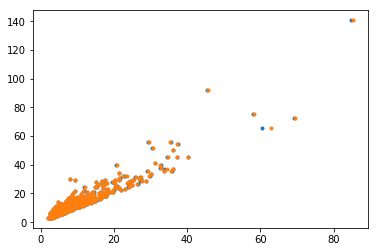

In [41]:
#plt.plot(BsTauTau_tau_df.BsTauTau_tau_pt.values, BsTauTau_tau_df.BsTauTau_gentaupt.values,".")
plt.plot(BsTauTau_tau_df.BsTauTau_tau_pt.values, gentaus.genParticle_pt[gentaus.muondecay == False].values,".")
plt.plot(BsTauTau_tau_df.BsTauTau_gentaupt.values, gentaus.genParticle_pt[gentaus.muondecay == False].values,".")

## add cartesian coordinates

In [42]:
data = BsTauTau_tau_df

In [43]:
data.insert(0, "tau_px", pd.eval("data.BsTauTau_tau_pt * cos(data.BsTauTau_tau_phi) "))
data.insert(1, "tau_py", pd.eval("data.BsTauTau_tau_pt * sin(data.BsTauTau_tau_phi) "))
data.insert(2, "tau_pz", pd.eval("data.BsTauTau_tau_pt * sinh(data.BsTauTau_tau_eta) "))
data.insert(3, "tau_abs", pd.eval("data.BsTauTau_tau_pt * cosh(data.BsTauTau_tau_eta) "))

data.insert(4,"pi1_px", pd.eval("data.BsTauTau_tau_pi1_pt * cos(data.BsTauTau_tau_pi1_phi) "))
data.insert(5, "pi1_py", pd.eval("data.BsTauTau_tau_pi1_pt * sin(data.BsTauTau_tau_pi1_phi) "))
data.insert(6, "pi1_pz", pd.eval("data.BsTauTau_tau_pi1_pt * sinh(data.BsTauTau_tau_pi1_eta) "))

data.insert(7,"pi2_px", pd.eval("data.BsTauTau_tau_pi2_pt * cos(data.BsTauTau_tau_pi2_phi) "))
data.insert(8, "pi2_py", pd.eval("data.BsTauTau_tau_pi2_pt * sin(data.BsTauTau_tau_pi2_phi) "))
data.insert(9, "pi2_pz", pd.eval("data.BsTauTau_tau_pi2_pt * sinh(data.BsTauTau_tau_pi2_eta) "))

data.insert(10,"pi3_px", pd.eval("data.BsTauTau_tau_pi3_pt * cos(data.BsTauTau_tau_pi3_phi) "))
data.insert(11, "pi3_py", pd.eval("data.BsTauTau_tau_pi3_pt * sin(data.BsTauTau_tau_pi3_phi) "))
data.insert(12, "pi3_pz", pd.eval("data.BsTauTau_tau_pi3_pt * sinh(data.BsTauTau_tau_pi3_eta) "))

In [44]:
## add labels to data
data["label_pt"] = gentaus[gentaus.muondecay == False].genParticle_pt.values
data["label_eta"] = gentaus[gentaus.muondecay == False].genParticle_eta.values
data["label_phi"] = gentaus[gentaus.muondecay == False].genParticle_phi.values

data.insert(0, "label_tau_px", pd.eval("data.label_pt * cos(data.label_phi) "))
data.insert(1, "label_tau_py", pd.eval("data.label_pt * sin(data.label_phi) "))
data.insert(2, "label_tau_pz", pd.eval("data.label_pt * sinh(data.label_eta) "))
data.insert(3, "label_tau_abs", pd.eval("data.label_pt * cosh(data.label_eta) "))

In [45]:
data

,,label_tau_px,label_tau_py,label_tau_pz,label_tau_abs,tau_px,tau_py,tau_pz,tau_abs,pi1_px,pi1_py,...,BsTauTau_tau_pvip,BsTauTau_tau_fl3d,BsTauTau_tau_fls3d,BsTauTau_tau_alpha,BsTauTau_tau_vprob,eventID,BsTauTau_gentaupt,label_pt,label_eta,label_phi
entry,subentry,,,,,,,,,,,,,,,,,,,,,
12,0,17.374229,3.727535,16.805120,24.457521,16.079876,3.506544,15.120465,22.349199,2.570151,0.363318,...,0.101361,1.068772,31.930779,0.995495,0.833538,12,16.661772,17.769590,0.842469,0.211340
19,0,-6.028078,5.050507,5.733839,9.732536,-5.175466,4.102050,5.263237,8.444757,-2.278998,2.086457,...,0.112045,0.698450,44.794254,0.987106,0.268432,19,6.660098,7.864181,0.676350,2.444206
72,0,-12.152181,-2.430022,-0.167849,12.393895,-9.745208,-2.429020,0.132038,10.044234,-2.139255,-0.678052,...,0.077288,0.480438,21.549049,0.986933,0.592891,72,10.053288,12.392759,-0.013544,-2.944230
107,0,5.018274,-6.000021,-3.797227,8.694957,3.596926,-3.810060,-3.028342,6.051883,2.059923,-1.946326,...,0.099801,0.648334,27.015110,0.988158,0.371364,107,5.256128,7.821978,-0.468166,-0.874265
174,0,-3.613045,6.548985,8.105549,11.029199,-2.864196,5.948339,6.954494,9.589127,-0.768047,0.841964,...,0.049640,0.568035,25.339661,0.996195,0.712429,174,6.563075,7.479526,0.939337,2.074940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22429,0,-10.154077,-15.756348,20.888914,28.066252,-9.314296,-14.254147,18.411636,25.078381,-4.885414,-7.465426,...,0.002979,0.589445,15.096260,0.999987,0.998996,22429,16.910074,18.744806,0.959988,-2.143255
22433,0,-8.209425,-12.805261,-0.588514,15.222210,-7.797266,-11.730286,-0.775640,14.106685,-1.322589,-1.518431,...,0.049374,0.595775,32.557987,0.996541,0.207281,22433,14.094181,15.210830,-0.038681,-2.140888
22434,0,-23.113842,7.598042,3.106780,24.528191,-11.298585,3.917200,1.801997,12.093372,-1.973390,0.481360,...,0.033187,0.646180,40.563641,0.998679,0.531953,22434,11.998010,24.330639,0.127346,2.823997


In [46]:
path = "MCSamples/csvfiles/"

In [47]:
data.to_csv(path + string + "_recotaus.csv")
BsTauTau_mu_df.to_csv(path + string + "_recomuons.csv")
gentaus.to_csv(path + string + "_gentaus.csv")
genmuons.to_csv(path + string + "_genmuons.csv")
gentauneutrinos.to_csv(path + string + "_gentauneutrinos.csv")
genmuonneutrinos.to_csv(path + string + "_genmuonneutrinos.csv")

## concat all csv files

In [71]:
#!ls -ltr MCSamples/csvfiles/

In [56]:
path_list = [
"MCSamples/csvfiles/flatTuple_part0_treeN_2_",
"MCSamples/csvfiles/flatTuple_part0_treeN_3_",
"MCSamples/csvfiles/flatTuple_part1_treeN_2_",
"MCSamples/csvfiles/flatTuple_part1_treeN_3_",
"MCSamples/csvfiles/flatTuple_part2_treeN_2_",
"MCSamples/csvfiles/flatTuple_part2_treeN_3_",
"MCSamples/csvfiles/flatTuple_part3_treeN_2_",
"MCSamples/csvfiles/flatTuple_part3_treeN_3_",
"MCSamples/csvfiles/flatTuple_part4_treeN_2_",
"MCSamples/csvfiles/flatTuple_part4_treeN_3_",
"MCSamples/csvfiles/flatTuple_part5_treeN_1_",
"MCSamples/csvfiles/flatTuple_part5_treeN_2_",
"MCSamples/csvfiles/flatTuple_part6_treeN_2_",
"MCSamples/csvfiles/flatTuple_part6_treeN_3_",
"MCSamples/csvfiles/flatTuple_part7_treeN_1_",
"MCSamples/csvfiles/flatTuple_part7_treeN_2_",
"MCSamples/csvfiles/flatTuple_part8_treeN_1_",
"MCSamples/csvfiles/flatTuple_part8_treeN_2_",
"MCSamples/csvfiles/flatTuple_part9_treeN_2_",
"MCSamples/csvfiles/flatTuple_part9_treeN_3_"]

In [66]:
def conc(string): #"reco_taus.csv"
    data = pd.DataFrame(data = None, columns = pd.read_csv(path_list[0] + string).columns )
    for i,file in enumerate(path_list):
        file = pd.read_csv(path_list[i] + string)
        file["file_number"] = i
        data = pd.concat([data,file], axis = 0 )
    return data

In [74]:
conc("recotaus.csv").to_csv("MCSamples/csvfiles/MC_recotaus.csv")
conc("recomuons.csv").to_csv("MCSamples/csvfiles/MC_recomuons.csv")
conc("gentaus.csv").to_csv("MCSamples/csvfiles/MC_gentaus.csv")
conc("genmuons.csv").to_csv("MCSamples/csvfiles/MC_genmuons.csv")
conc("gentauneutrinos.csv").to_csv("MCSamples/csvfiles/MC_gentauneutrinos.csv")
conc("genmuonneutrinos.csv").to_csv("MCSamples/csvfiles/MC_genmuonneutrinos.csv")

## function to convert from cartesian to eta-phi space

In [ ]:
def to_eta_phi(preds_df):
    # we need atan2 and not arctan
    preds_df.insert(0,"pred_tau_phi", np.arctan2(preds_df.py, preds_df.px))
    preds_df.insert(1, "pred_tau_pt", pd.eval(" preds_df.px/ cos(preds_df.pred_tau_phi) "))
    preds_df.insert(2, "pred_tau_eta", pd.eval(" arcsinh(preds_df.pz/ preds_df.pred_tau_pt) "))
    return preds_df

## histograms and pairgrid

In [75]:
data = pd.read_csv("MCSamples/csvfiles/MC_recotaus.csv")#path + string + "_recotaus.csv")

Text(0.5, 1.0, 'pi3_phi')

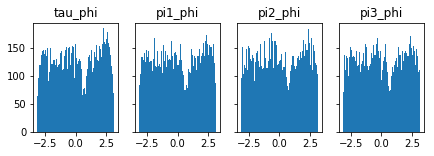

In [76]:
plt.rcParams['figure.figsize'] = [7, 2]
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, sharey= True)
ax1.hist(data.BsTauTau_tau_phi, bins = 100);#, log = True);
ax1.set_title("tau_phi")
ax2.hist(data.BsTauTau_tau_pi1_phi, bins = 100);#, log = True);
ax2.set_title("pi1_phi")
ax3.hist(data.BsTauTau_tau_pi2_phi, bins = 100);#, log = True);
ax3.set_title("pi2_phi")
ax4.hist(data.BsTauTau_tau_pi3_phi, bins = 100);#, log = True);
ax4.set_title("pi3_phi")

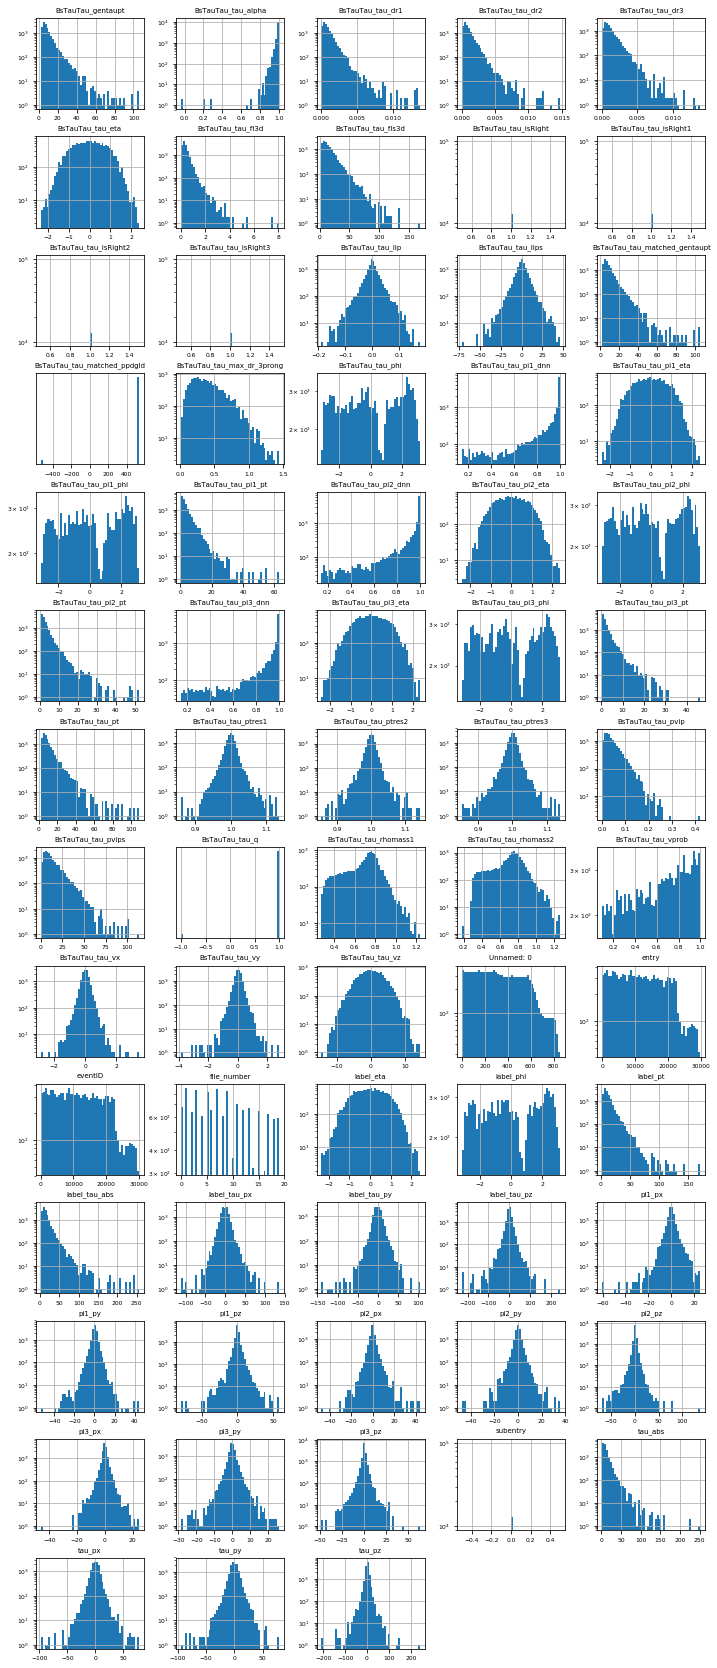

In [78]:
#fig = plt.figure()
plt.rcParams.update({'axes.titlesize': 7})
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
ax = data.hist(bins = 50, figsize = (12,30), layout = (-1,5), log = True, ylabelsize= 6, xlabelsize = 6);
#fig.savefig('data_hists.png')
plt.savefig( "all_hists.png")

## scatter pair plots 

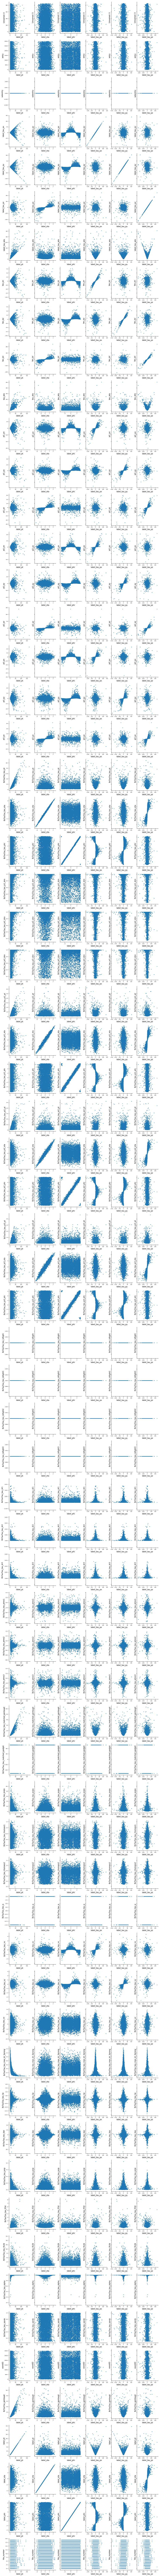

In [79]:
g = sns.PairGrid(data, x_vars= ['label_pt',  'label_eta', 'label_phi','label_tau_px', 
                                'label_tau_py', 'label_tau_pz'], y_vars = data.columns, height=3, aspect=0.7)
g = g.map(plt.scatter, s = 3)
plt.subplots_adjust(hspace=0.2, wspace=0.2)

xlabels,ylabels = [],[]

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].tick_params(axis='x',labelbottom = True)
        g.axes[j,i].xaxis.set_label_text(xlabels[i])
        g.axes[j,i].yaxis.set_label_text(ylabels[j])

plt.savefig("all_pairgrid.png")